In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.shape

(32561, 15)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
print(data['income'].value_counts(normalize = True))

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


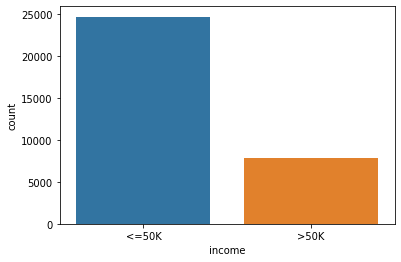

In [7]:
sns.countplot(data['income'])

There is an imbalance in the income class data. A dummy model which always predicts "income = <=50K" is 75.91% accurate

In [8]:
#Classify the income column as '<=50K' ---> 0, '>50K' ---> 1
val = {'<=50K':0, '>50K':1}
data['income'] = data['income'].apply(lambda x:val[x])

In [9]:
num_col = data.select_dtypes('number').columns
num_col

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [10]:
cat_col = data.select_dtypes('object').columns
cat_col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

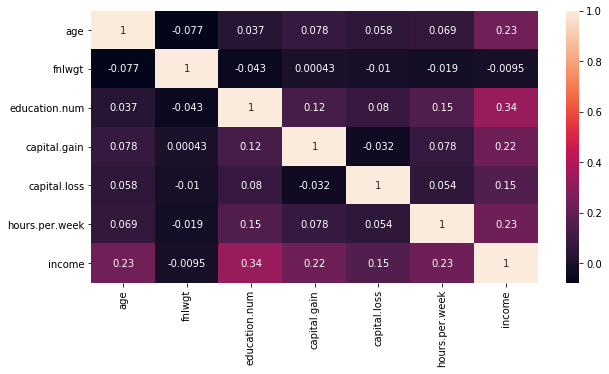

In [11]:
#Let us check the correlation matrix
corr_hmap = data[num_col].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [12]:
data.drop('fnlwgt',inplace = True, axis = 1) #fnlwgt has very low correlation with Income. Hence the column can be drooped

In [13]:
#Effect of Age on Income
#Let us analyse the age group which is leaving the company
#Here the age is divided into groups of '17-30', '30-45','45-60','60-90'
print(data['age'].max())
print(data['age'].min())

90
17


In [14]:
temp1 = pd.cut(data['age'], bins = [17,31,46,61,91], labels = ['17-30', '30-45','45-60','60-90'])

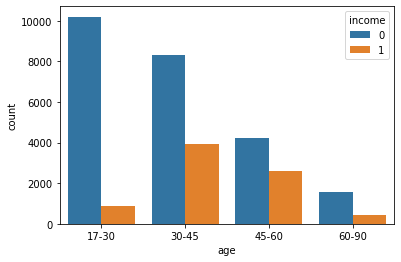

In [15]:
sns.countplot(x= temp1 , hue = data['income'])

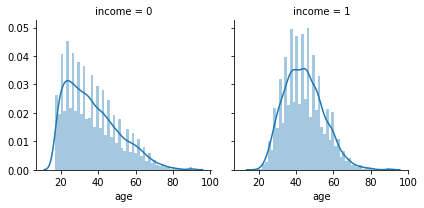

In [16]:
age_inc = sns.FacetGrid(data, col='income')
age_inc = age_inc.map(sns.distplot, "age")
plt.show()

Observation:
1. Most of the population in the age group of 17-30 has income <=50K
2. Income is >50K in the age group 35-45

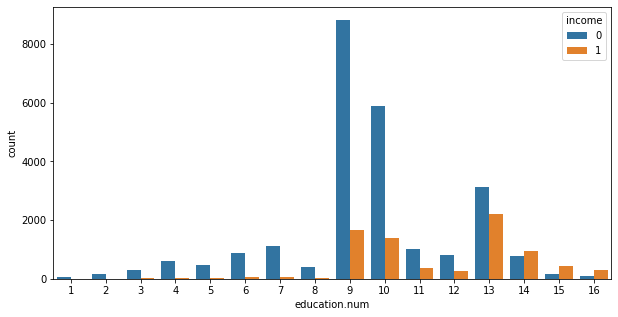

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x= data['education.num'] , hue = data['income'])
plt.show()

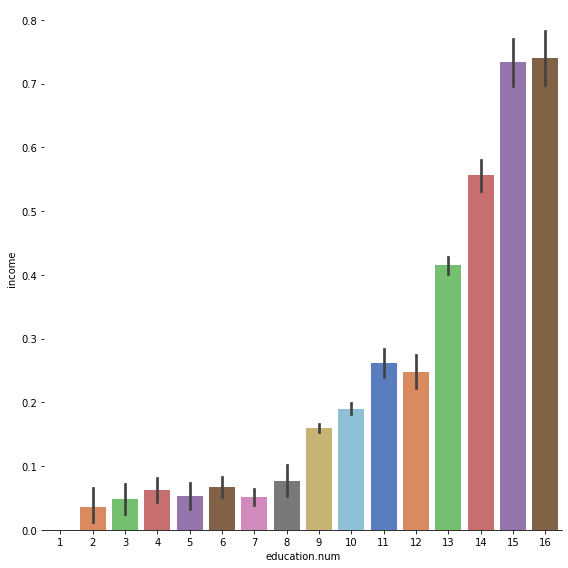

In [18]:
edu_inc = sns.factorplot(x="education.num",y="income",data=data,kind="bar", size = 8, palette = "muted")
edu_inc.despine(left=True)

Observation:
    Probability of getting income >50K is highest when the education.num is 16.

In [19]:
data['capital.gain'].replace({0:data['capital.gain'].mean()}, inplace = True)
data['capital.loss'].replace({0:data['capital.loss'].mean()}, inplace = True)

In [20]:
print(data['hours.per.week'].min())
print(data['hours.per.week'].max())

1
99


In [21]:
temp2 = pd.cut(data['hours.per.week'], bins = [1,21,41,61,100], labels = ['1-20', '21-40','41-60','61-100'])

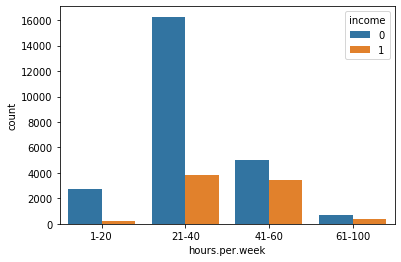

In [22]:
sns.countplot(x = temp2, hue = data['income'])

Observation:
    hours.per.week in the range of 41-60 yields income >50K

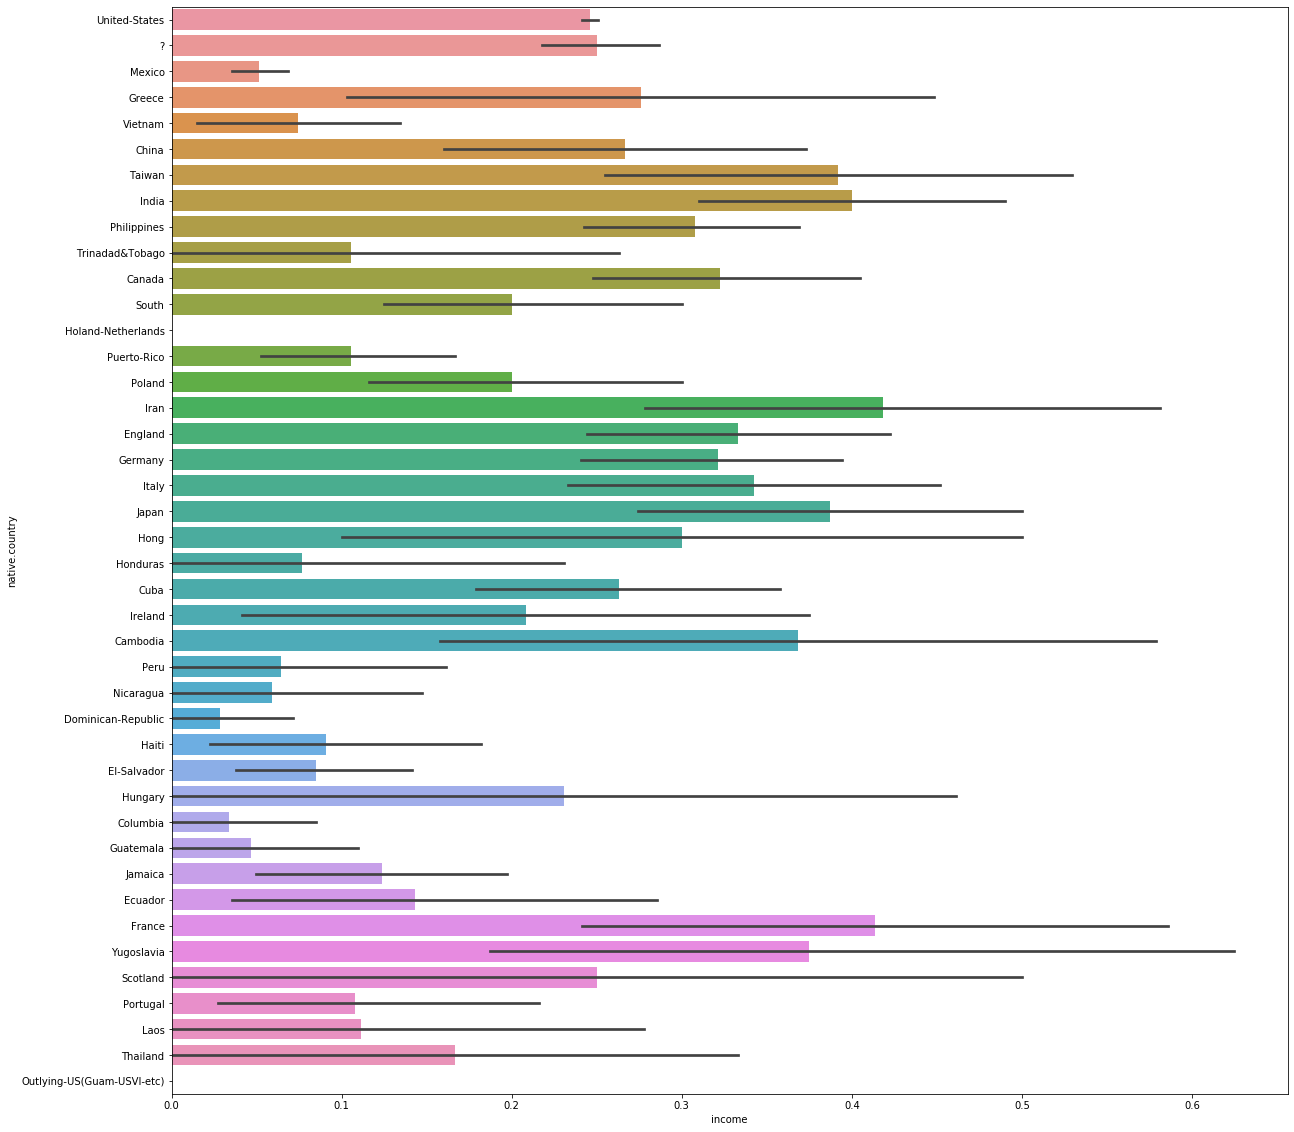

In [23]:
plt.subplots(figsize = (20,20))
sns.barplot(y = data['native.country'], x= data['income'])

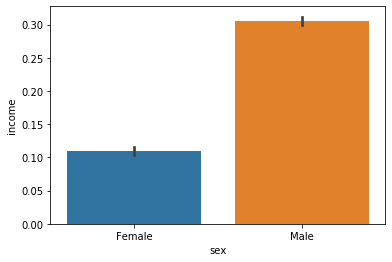

In [24]:
#Let us analyse Gender vs Income
sex_income = sns.barplot(x="sex",y="income",data=data)
plt.show()

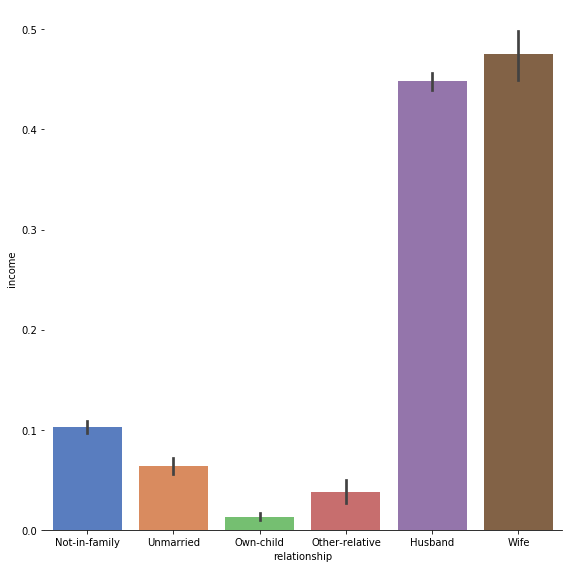

In [25]:
#Let us analyze Relationship vs Income
relation_inc = sns.catplot(x="relationship",y="income",data=data,kind="bar", size = 8, palette = "muted")
relation_inc.despine(left=True)

Observation:
Married people have a probability of earning more than 50K

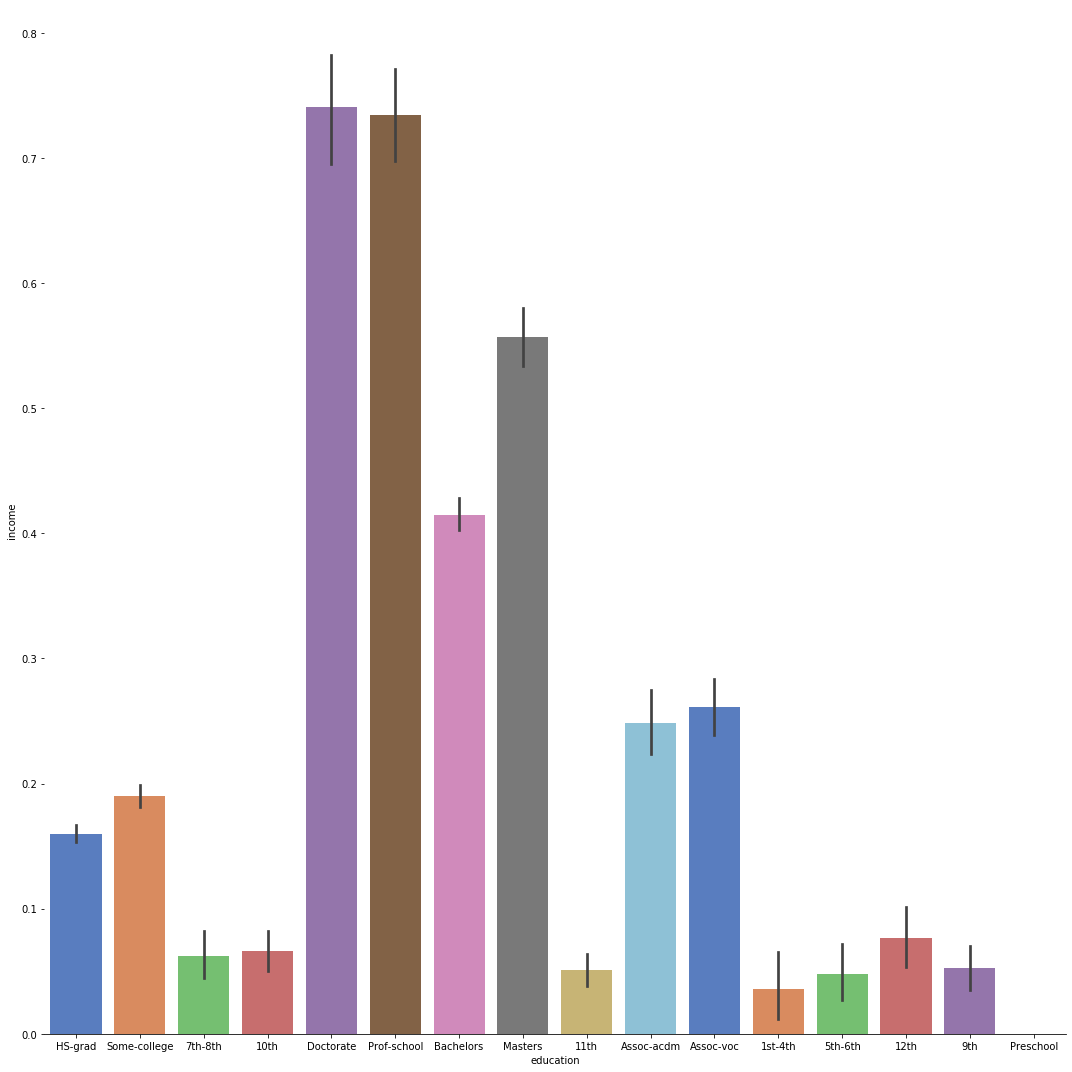

In [26]:
#Let us analyze Education vs Income
edu_inc = sns.catplot(x="education",y="income",data=data,kind="bar", size = 15, palette = "muted")
edu_inc.despine(left=True)

Observation:
People with Doctorate yield salary greater than 50K

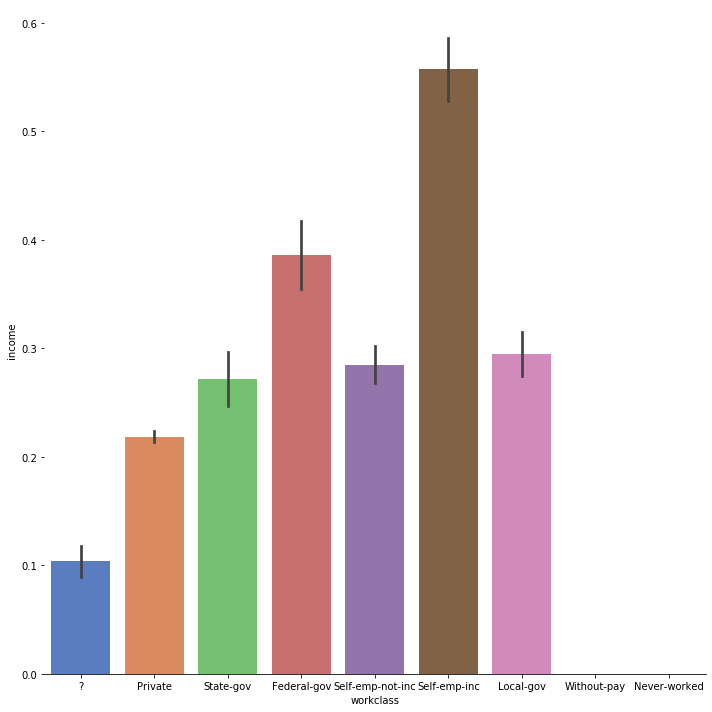

In [27]:
#Let us analyze workclass vs Income
workclass_inc = sns.catplot(x="workclass",y="income",data=data,kind="bar", size = 10, palette = "muted")
workclass_inc.despine(left=True)

Observation:
Self employed people earn more than 50K

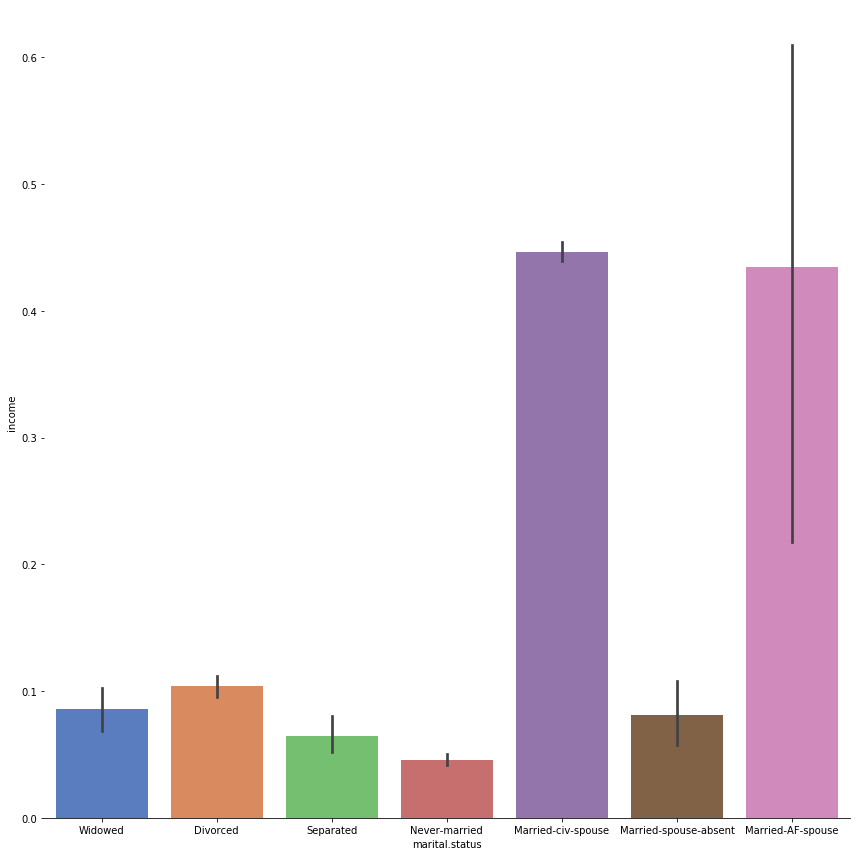

In [28]:
#Let us analyze Marital status vs Income
marital_inc = sns.catplot(x="marital.status",y="income",data=data,kind="bar", size = 12, palette = "muted")
marital_inc.despine(left=True)

Observation:
People who are married and who are with their spouse have a probability of getting more than 50K income

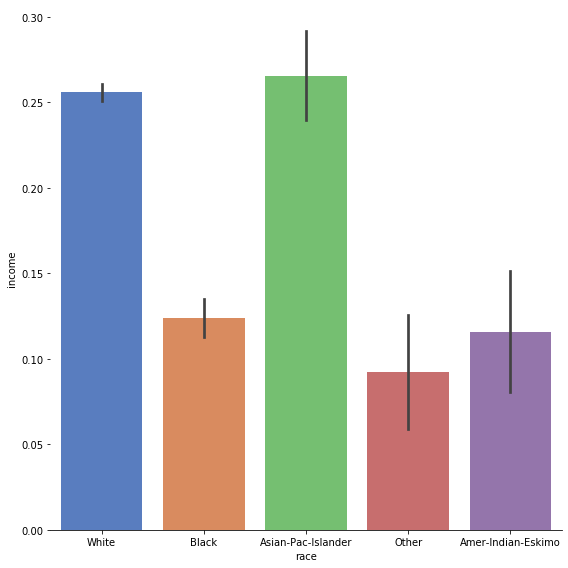

In [29]:
#Let us analyze race vs Income
race_inc = sns.catplot(x="race",y="income",data=data,kind="bar", size = 8, palette = "muted")
race_inc.despine(left=True)

Observation:
1. White and Asian-Pac-Islander race has a probability of earning more than 50K

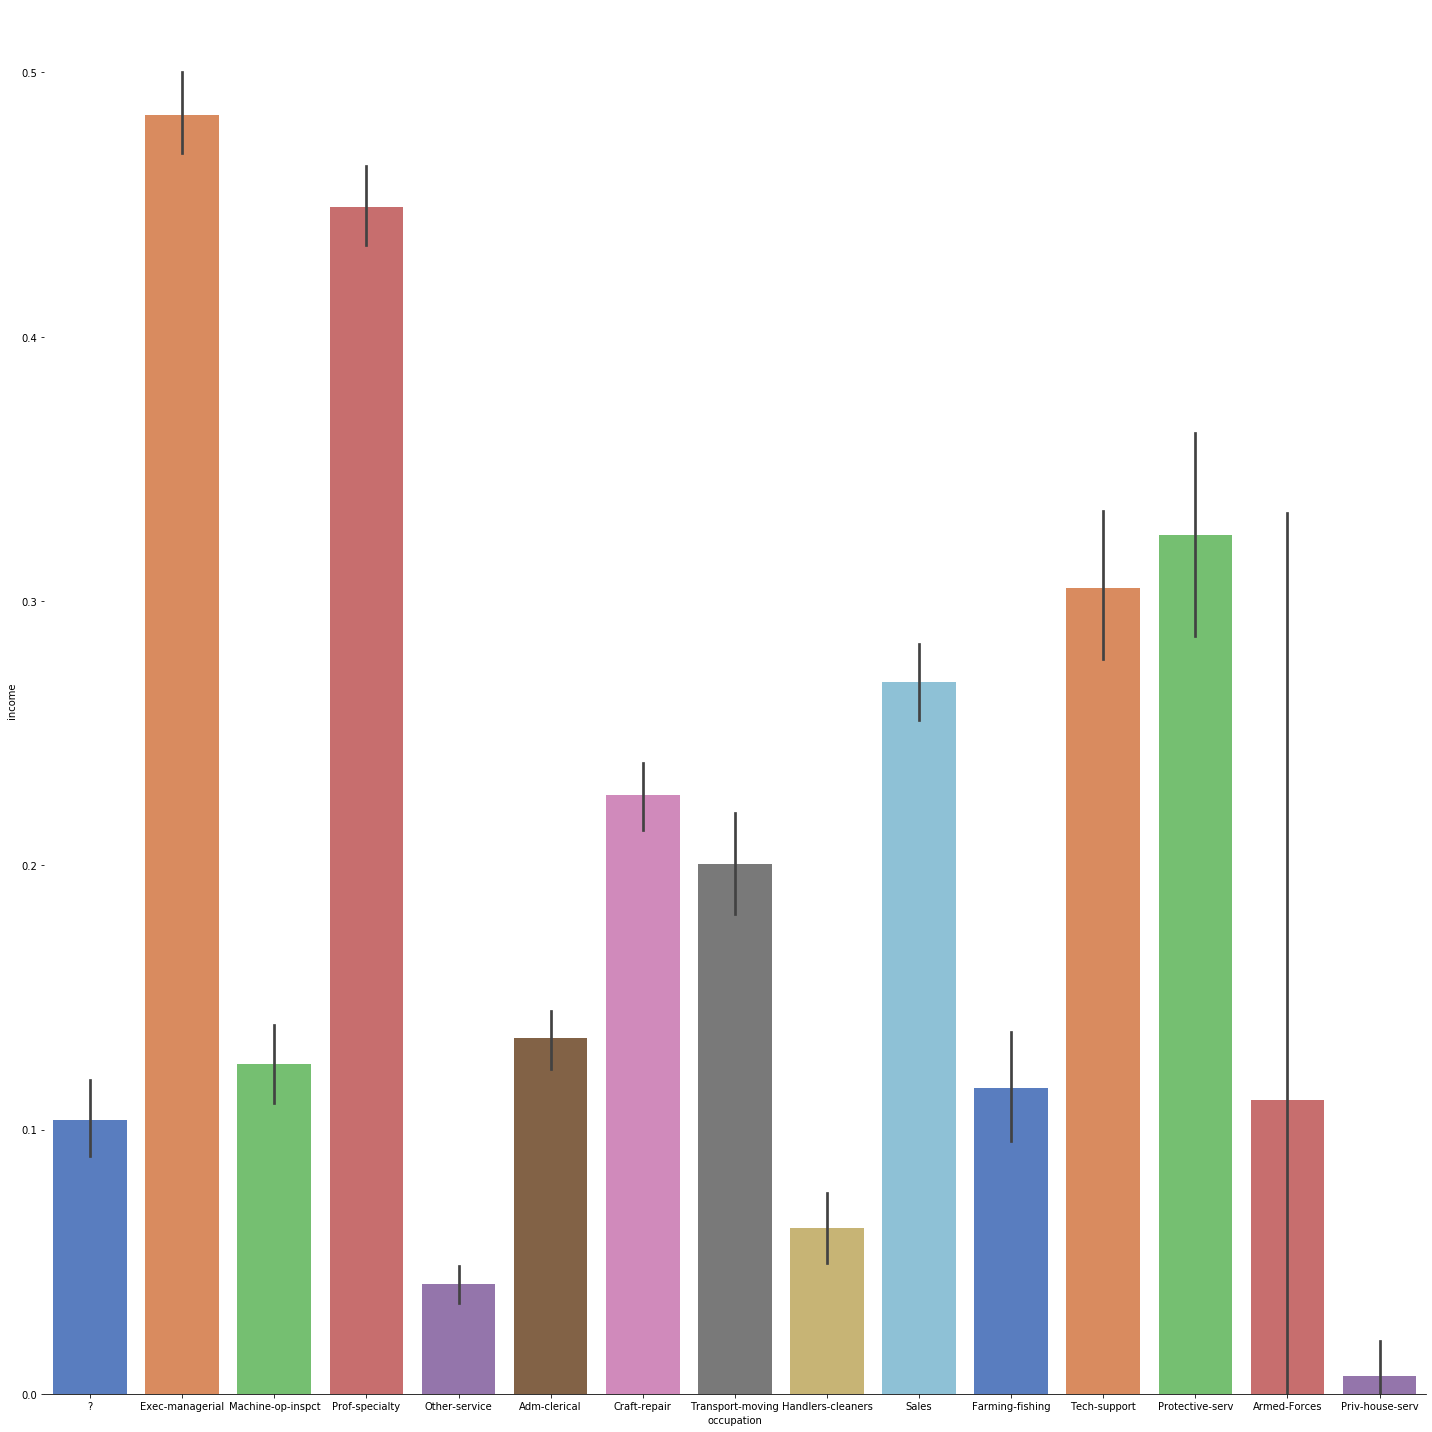

In [30]:
#Let us analyze occupation vs Income
occ_inc = sns.catplot(x="occupation",y="income",data=data,kind="bar", size = 20, palette = "muted")
occ_inc.despine(left=True)

Observation:
People working as 'Exec-Managerial' and 'Prof-speciality' has a higher probability of earning more than 50K

In [31]:
#Categorical type columns and its classes
for col in data.select_dtypes(['object']).columns:
    print(col, ':', sorted(data[col].unique()))

workclass : ['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
education : ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
marital.status : ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation : ['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
relationship : ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']
race : ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
sex : ['Female', 'Male']
native.country : ['?', 'Cambodia', 'Canada', 'China', 'Columbia

In [32]:
data['workclass'] = data['workclass'].replace({'?':'Private'})
data['occupation'] = data['occupation'].replace({'?' : 'Other-service'})
data['native.country'] = data['native.country'].replace({'?' : 'United-States'})

In [33]:
#Categorical type columns and its classes
for col in data.select_dtypes(['object']).columns:
    print(col, ':', sorted(data[col].unique()))

workclass : ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
education : ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
marital.status : ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation : ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
relationship : ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']
race : ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
sex : ['Female', 'Male']
native.country : ['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dom

In [34]:
from sklearn import preprocessing

cat = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for col in cat:
        enc = preprocessing.LabelEncoder()
        data[col] = enc.fit_transform(data[col])

In [35]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,11,9,6,7,1,4,0,1077.648844,4356.00000,40,38,0
1,82,3,11,9,6,3,1,4,0,1077.648844,4356.00000,18,38,0
2,66,3,15,10,6,7,4,2,0,1077.648844,4356.00000,40,38,0
3,54,3,5,4,0,6,4,4,0,1077.648844,3900.00000,40,38,0
4,41,3,15,10,5,9,3,4,0,1077.648844,3900.00000,40,38,0
5,34,3,11,9,0,7,4,4,0,1077.648844,3770.00000,45,38,0
6,38,3,0,6,5,0,4,4,1,1077.648844,3770.00000,40,38,0
7,74,6,10,16,4,9,2,4,0,1077.648844,3683.00000,20,38,1
8,68,0,11,9,0,9,1,4,0,1077.648844,3683.00000,40,38,0
9,41,3,15,10,4,2,4,4,1,1077.648844,3004.00000,60,38,1


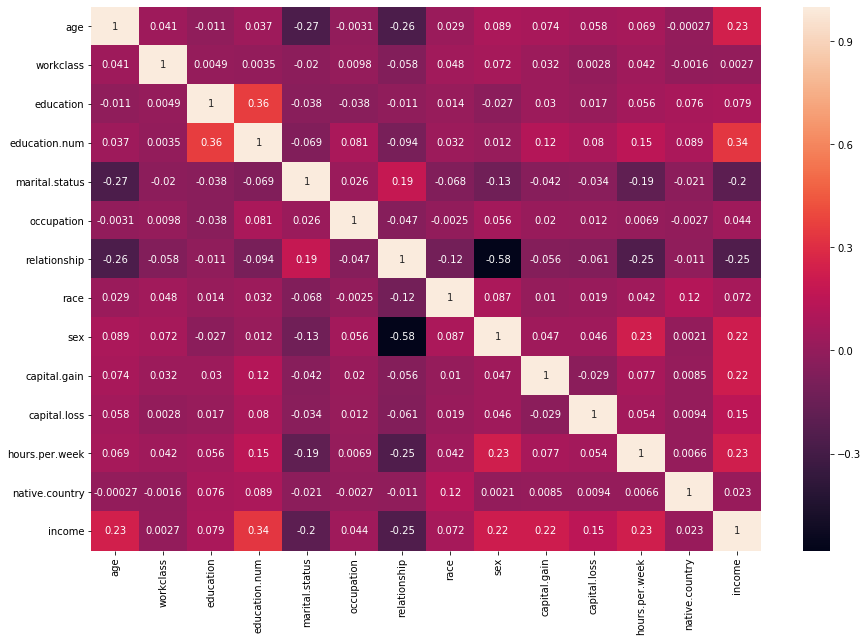

In [36]:
corr_hmap = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [37]:
data.drop(['workclass','education','occupation','race','native.country','relationship','capital.loss'], axis = 1, inplace = True)

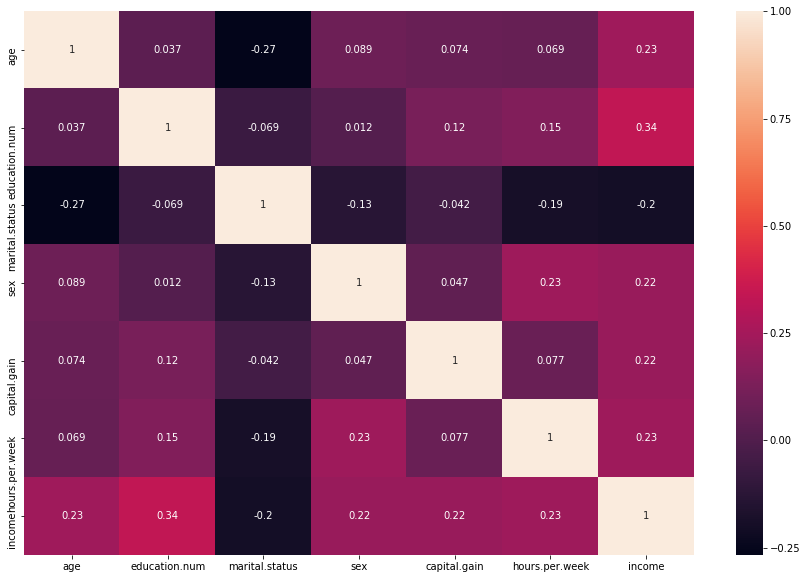

In [38]:
corr_hmap = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [39]:
data

,age,education.num,marital.status,sex,capital.gain,hours.per.week,income
0,90,9,6,0,1077.648844,40,0
1,82,9,6,0,1077.648844,18,0
2,66,10,6,0,1077.648844,40,0
3,54,4,0,0,1077.648844,40,0
4,41,10,5,0,1077.648844,40,0
5,34,9,0,0,1077.648844,45,0
6,38,6,5,1,1077.648844,40,0
7,74,16,4,0,1077.648844,20,1
8,68,9,0,0,1077.648844,40,0
9,41,10,4,1,1077.648844,60,1


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score  

In [41]:
x = data.drop(['income'],axis = 1)

In [42]:
y = data['income']

In [43]:
x.shape

(32561, 6)

In [44]:
y.shape

(32561,)

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 8)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(22792, 6) (9769, 6) (22792,) (9769,)


In [46]:
log = LogisticRegression(random_state=42)
logmodel = log.fit(x_train, y_train)

print("Trainig accuracy",log.score(x_train,y_train))  
print("Testing accuracy",log.score(x_test, y_test))

y_pred = logmodel.predict(x_test)

Trainig accuracy 0.8217795717795717
Testing accuracy 0.8155389497389702


In [47]:
print("F1 Score: ",f1_score(y_test, y_pred, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_test,y_pred), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test, y_pred), "\n====================")
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))

F1 Score:  0.5215082315454063 
Classification Report
                precision    recall  f1-score   support

           0       0.83      0.94      0.89      7392
           1       0.71      0.41      0.52      2377

    accuracy                           0.82      9769
   macro avg       0.77      0.68      0.70      9769
weighted avg       0.80      0.82      0.80      9769
 
Confusion Matrix
  [[6985  407]
 [1395  982]] 
ROC AUC Score:  0.6790331324999498


In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=6, max_depth=14, min_samples_split=3 ,n_jobs=None ,random_state=42)
Model = rfc.fit(x_train, y_train)

y_pred = Model.predict(x_test)

print("Training accuracy",rfc.score(x_train,y_train))  
print("Testing accuracy",rfc.score(x_test, y_test))

print("F1 Score: ",f1_score(y_test, y_pred, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_test,y_pred), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test, y_pred), "\n====================")
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))

Training accuracy 0.8735521235521235
Testing accuracy 0.8451223257242297
F1 Score:  0.6281641681002703 
Classification Report
                precision    recall  f1-score   support

           0       0.86      0.94      0.90      7392
           1       0.76      0.54      0.63      2377

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769
 
Confusion Matrix
  [[6978  414]
 [1099 1278]] 
ROC AUC Score:  0.7408230048243721


age                   AxesSubplot(0.125,0.71587;0.133621x0.16413)
education.num      AxesSubplot(0.285345,0.71587;0.133621x0.16413)
marital.status      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
sex                AxesSubplot(0.606034,0.71587;0.133621x0.16413)
capital.gain       AxesSubplot(0.766379,0.71587;0.133621x0.16413)
hours.per.week       AxesSubplot(0.125,0.518913;0.133621x0.16413)
income            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
dtype: object

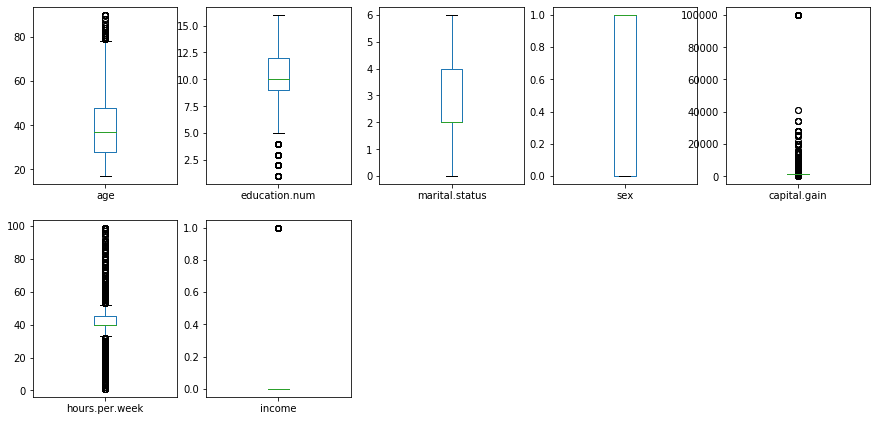

In [49]:
data.plot(kind = 'box', subplots = True, layout = (4,5), figsize = (15,15))

In [50]:
#There are outliers in the data. So, remove the outliers using zscore < 3
from scipy.stats import zscore
z_score = abs(zscore(data))
print(data.shape)
data = data.loc[(z_score<3).all(axis = 1)]
print(data.shape)

(32561, 7)
(31587, 7)


age                   AxesSubplot(0.125,0.71587;0.133621x0.16413)
education.num      AxesSubplot(0.285345,0.71587;0.133621x0.16413)
marital.status      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
sex                AxesSubplot(0.606034,0.71587;0.133621x0.16413)
capital.gain       AxesSubplot(0.766379,0.71587;0.133621x0.16413)
hours.per.week       AxesSubplot(0.125,0.518913;0.133621x0.16413)
income            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
dtype: object

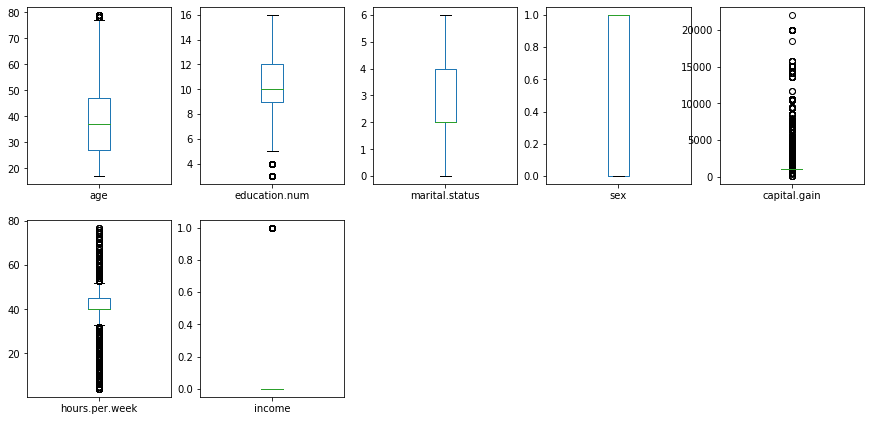

In [51]:
data.plot(kind = 'box', subplots = True, layout = (4,5), figsize = (15,15))

In [52]:
x1 = data.drop(['income'],axis = 1)
y1 = data['income']

x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state = 18)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

log1 = LogisticRegression(random_state=42)
logmodel1 = log1.fit(x_train1, y_train1)

print("Trainig accuracy",log1.score(x_train1,y_train1))  
print("Testing accuracy",log1.score(x_test1, y_test1))

y_pred1 = logmodel1.predict(x_test1)

print("F1 Score: ",f1_score(y_test1, y_pred1, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_test1,y_pred1), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test1, y_pred1), "\n====================")
print("ROC AUC Score: ",roc_auc_score(y_test1,y_pred1))

(22110, 6) (9477, 6) (22110,) (9477,)
Trainig accuracy 0.8188150158299412
Testing accuracy 0.8271604938271605
F1 Score:  0.5404040404040404 
Classification Report
                precision    recall  f1-score   support

           0       0.85      0.94      0.89      7295
           1       0.70      0.44      0.54      2182

    accuracy                           0.83      9477
   macro avg       0.77      0.69      0.72      9477
weighted avg       0.81      0.83      0.81      9477
 
Confusion Matrix
  [[6876  419]
 [1219  963]] 
ROC AUC Score:  0.6919508107018041


In [53]:
rfc1 = RandomForestClassifier(n_estimators=6, max_depth=14, min_samples_split=3 ,n_jobs=None ,random_state=42)
Model1 = rfc1.fit(x_train1, y_train1)

y_pred1 = Model1.predict(x_test1)

print("Training accuracy",rfc1.score(x_train1,y_train1))  
print("Testing accuracy",rfc1.score(x_test1, y_test1))

print("F1 Score: ",f1_score(y_test1, y_pred1, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_test1,y_pred1), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test1, y_pred1), "\n====================")
print("ROC AUC Score: ",roc_auc_score(y_test1,y_pred1))

Training accuracy 0.8736770691994573
Testing accuracy 0.8464704020259576
F1 Score:  0.6590110147644714 
Classification Report
                precision    recall  f1-score   support

           0       0.90      0.91      0.90      7295
           1       0.67      0.64      0.66      2182

    accuracy                           0.85      9477
   macro avg       0.78      0.78      0.78      9477
weighted avg       0.84      0.85      0.85      9477
 
Confusion Matrix
  [[6616  679]
 [ 776 1406]] 
ROC AUC Score:  0.7756427597220452


In [54]:
from sklearn import tree

DTC = tree.DecisionTreeClassifier()
Model2 = DTC.fit(x_train1, y_train1)

y_pred3 = Model2.predict(x_test1)

print("Trainig accuracy",DTC.score(x_train1,y_train1))  
print("Testing accuracy",DTC.score(x_test1, y_test1))

print("F1 Score: ",f1_score(y_test1, y_pred3, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_test1,y_pred3), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test1, y_pred3), "\n====================")
print("ROC AUC Score: ",roc_auc_score(y_test1,y_pred3))

Trainig accuracy 0.9144730890999547
Testing accuracy 0.8198797087685976
F1 Score:  0.5871825876662636 
Classification Report
                precision    recall  f1-score   support

           0       0.87      0.90      0.88      7295
           1       0.62      0.56      0.59      2182

    accuracy                           0.82      9477
   macro avg       0.75      0.73      0.74      9477
weighted avg       0.81      0.82      0.82      9477
 
Confusion Matrix
  [[6556  739]
 [ 968 1214]] 
ROC AUC Score:  0.7275340203258137
